<a href="https://colab.research.google.com/github/ECastro08/Alura-Store-Challenge/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.sample(3)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
1617,Secadora de ropa,Electrodomésticos,1141000.0,61400.0,13/09/2021,Santiago Silva,Bogotá,5,Tarjeta de crédito,3,4.60971,-74.08175
2220,Silla de oficina,Muebles,430300.0,21100.0,21/06/2022,Blanca Ramirez,Medellín,4,Tarjeta de crédito,8,6.25184,-75.56359
660,Impresora,Electrónicos,292100.0,16000.0,22/05/2021,Santiago Silva,Medellín,5,Tarjeta de crédito,10,6.25184,-75.56359


### Analisis de los datos

In [2]:
tienda3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [3]:
def buscar_nulos(tienda):
  nulos = tienda.isnull().count()
  return nulos

# llamamos a la funcion y le pasamos el df de cada tienda

#buscar_nulos(tienda4)


#### *de acuerdo al analisis anterior observamos el tipo de datos de cada una de las columnas, y tambien contamos con que ningun dataset tiene valores nulos.*

#1. Análisis de facturación



In [4]:
from numpy._core.fromnumeric import mean
ingreso_tienda1 = sum(tienda['Precio'])
ingreso_tienda2 = sum(tienda2['Precio'])
ingreso_tienda3 = sum(tienda3['Precio'])
ingreso_tienda4 = sum(tienda4['Precio'])

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]


# 2. Ventas por categoría

## Agrupando las columnas de cada uno de los datasets de las tiendas para ver la cantidad de productos vendidos

In [5]:
df1_ventas = tienda.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
df2_ventas = tienda2.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
df3_ventas = tienda3.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
df4_ventas = tienda4.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)


# 3. Calificación promedio de la tienda


## obteniendo el promedio de las calificaciones de cada tienda

In [6]:
calificacion_tienda1 = round(tienda.Calificación.mean(),3)
calificacion_tienda2 = round(tienda2.Calificación.mean(),3)
calificacion_tienda3 = round(tienda3.Calificación.mean(),3)
calificacion_tienda4 = round(tienda4.Calificación.mean(),3)

# 4. Productos más y menos vendidos

In [7]:
tienda1_product_counts = tienda.groupby('Producto')['Producto'].count().sort_values(ascending=False)
tienda2_product_counts = tienda2.groupby('Producto')['Producto'].count().sort_values(ascending=False)
tienda3_product_counts = tienda3.groupby('Producto')['Producto'].count().sort_values(ascending=False)
tienda4_product_counts = tienda4.groupby('Producto')['Producto'].count().sort_values(ascending=False)

# 5. Envío promedio por tienda

In [8]:
tienda['costo_total_con_envio'] = tienda['Precio'] + tienda['Costo de envío']
tienda2['costo_total_con_envio'] = tienda2['Precio'] + tienda2['Costo de envío']
tienda3['costo_total_con_envio'] = tienda3['Precio'] + tienda3['Costo de envío']
tienda4['costo_total_con_envio'] = tienda4['Precio'] + tienda4['Costo de envío']

In [9]:
promedio_costo_tienda1 = round(tienda.costo_total_con_envio.mean(),3)
promedio_costo_tienda2 = round(tienda2.costo_total_con_envio.mean(),3)
promedio_costo_tienda3 = round(tienda3.costo_total_con_envio.mean(),3)
promedio_costo_tienda4 = round(tienda4.costo_total_con_envio.mean(),3)


# 6. Graficos

### Ingresos totales por tienda

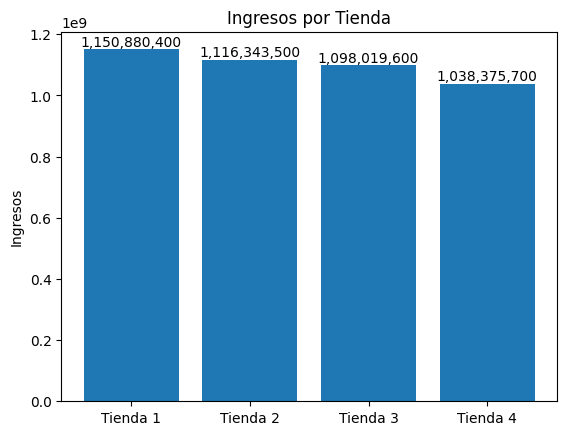

In [10]:
fig, ax = plt.subplots()
bar_container = ax.bar(tiendas, ingresos)
ax.set(ylabel='Ingresos', title='Ingresos por Tienda')
ax.bar_label(bar_container, fmt='{:,.0f}')
plt.show()

### Cantidad de Productos vendidos por tienda

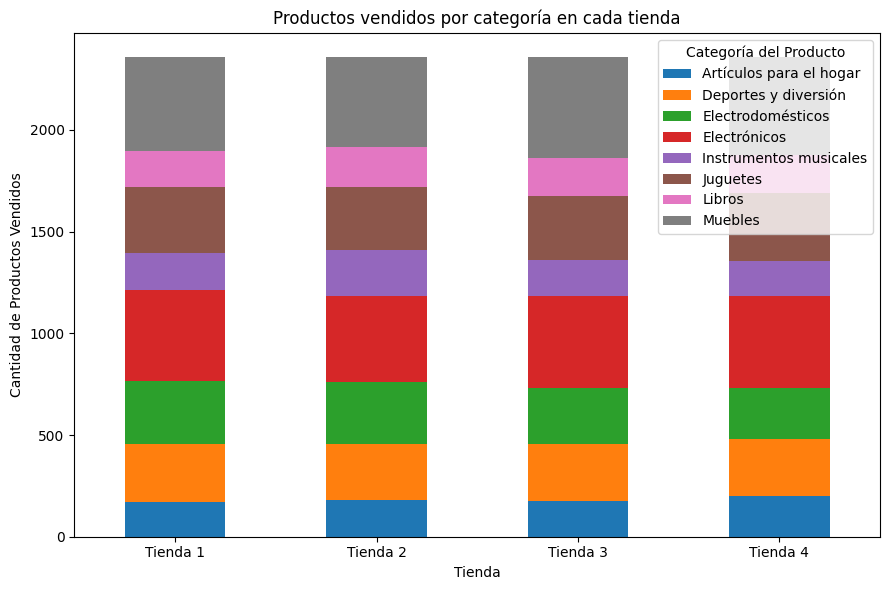

In [11]:
df_ventas_combinado = pd.DataFrame({
    'Tienda 1': df1_ventas,
    'Tienda 2': df2_ventas,
    'Tienda 3': df3_ventas,
    'Tienda 4': df4_ventas
})

df_ventas_combinado.T.plot(kind='bar', stacked=True, figsize=(9, 6))
plt.title('Productos vendidos por categoría en cada tienda')
plt.xlabel('Tienda')
plt.ylabel('Cantidad de Productos Vendidos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

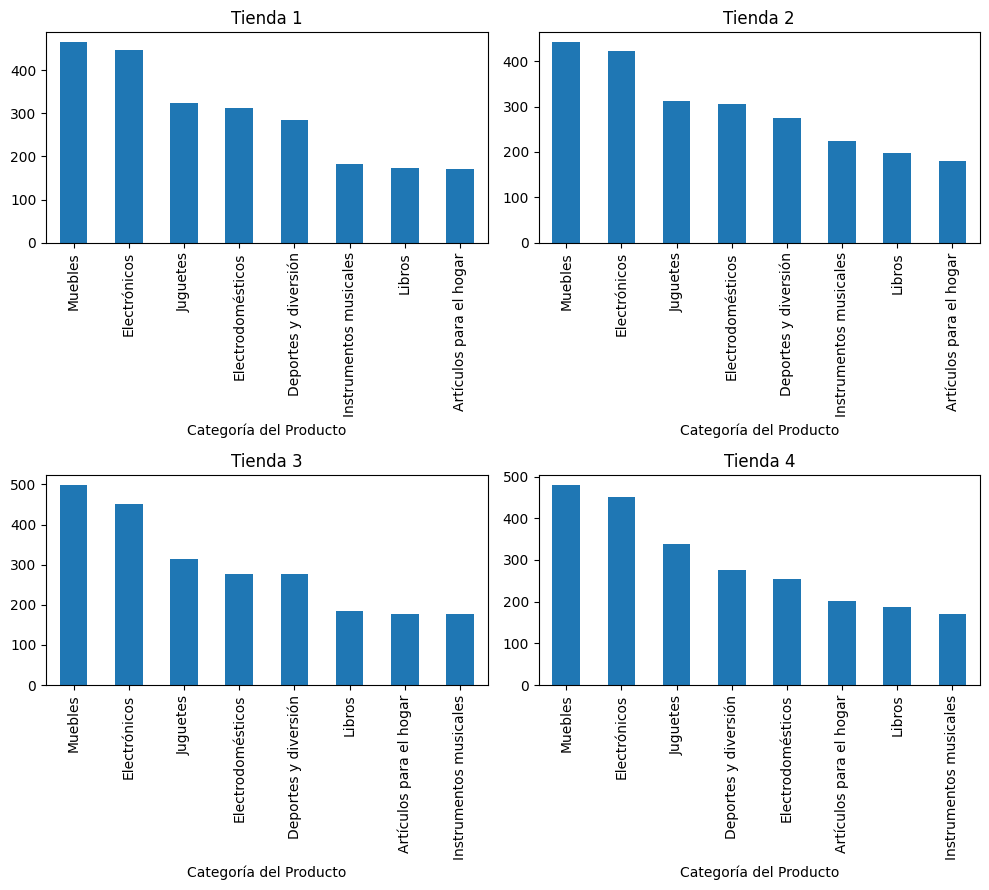

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(10, 9))

df1_ventas.plot(kind='bar', ax=axes[0, 0], title='Tienda 1')
df2_ventas.plot(kind='bar', ax=axes[0, 1], title='Tienda 2')
df3_ventas.plot(kind='bar', ax=axes[1, 0], title='Tienda 3')
df4_ventas.plot(kind='bar', ax=axes[1, 1], title='Tienda 4')

plt.tight_layout()
plt.show()

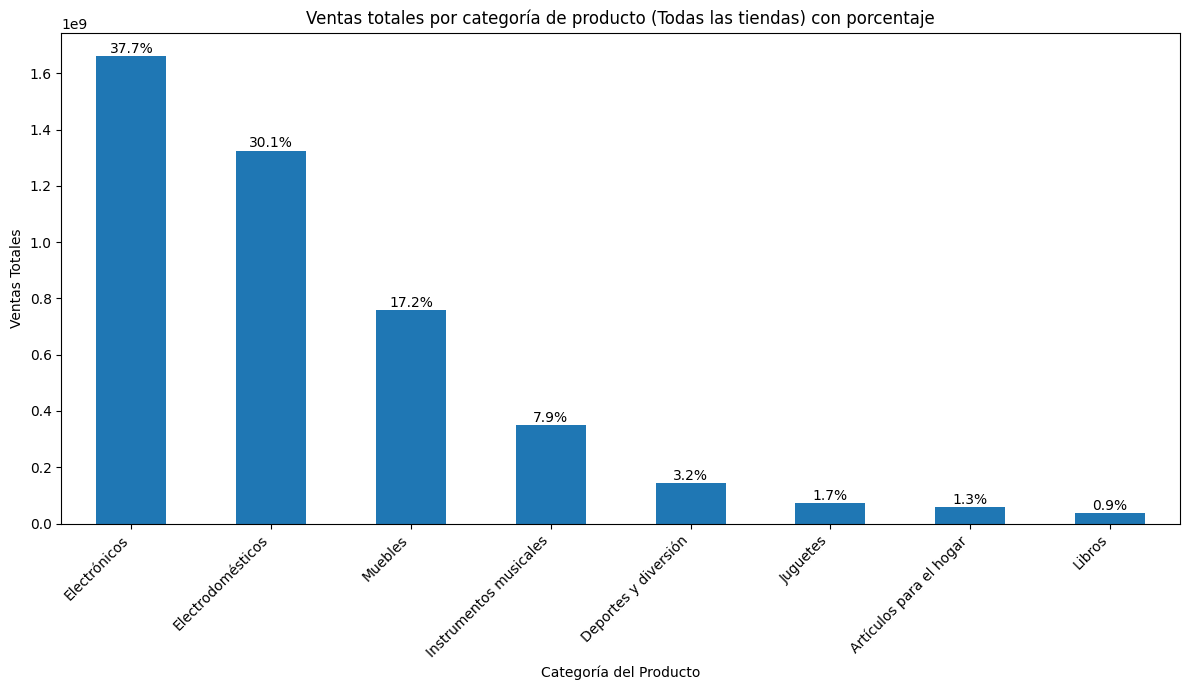

In [13]:

df_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])

ventas_categoria = df_tiendas.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)

ventas_totales_tiendas = ventas_categoria.sum()
porcentaje_categoria = (ventas_categoria / ventas_totales_tiendas) * 100

plt.figure(figsize=(12, 7))
ax = ventas_categoria.plot(kind='bar')
plt.title('Ventas totales por categoría de producto (Todas las tiendas) con porcentaje')
plt.xlabel('Categoría del Producto')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(ventas_categoria):
    ax.text(i, v + 1000000, f'{porcentaje_categoria.iloc[i]:.1f}%', ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.show()

### Calificacion promedio por tienda

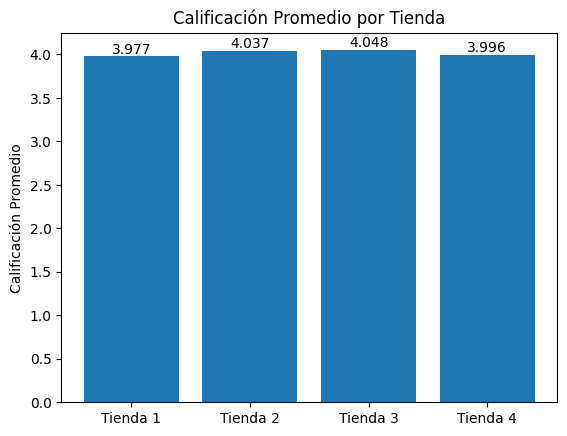

In [14]:
calificaciones = [calificacion_tienda1, calificacion_tienda2, calificacion_tienda3, calificacion_tienda4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

fig, ax = plt.subplots()
bar_container = ax.bar(tiendas, calificaciones)
ax.set(ylabel='Calificación Promedio', title='Calificación Promedio por Tienda')
ax.bar_label(bar_container, fmt='{:,.3f}')
plt.show()

### Top de productos mas y menos vendidos por tienda

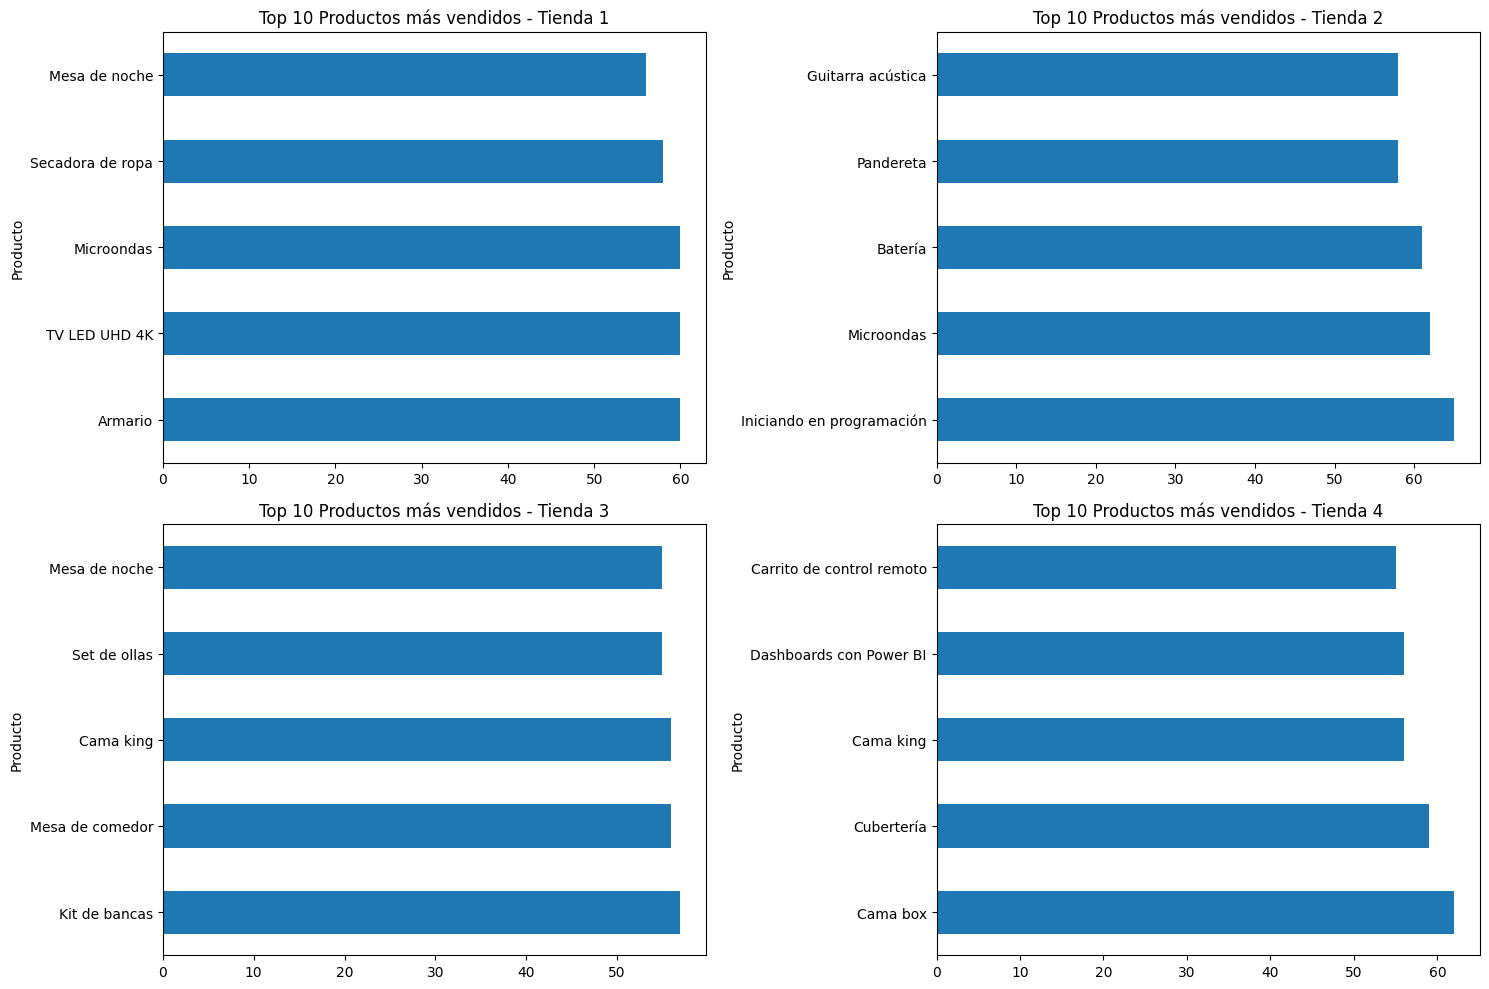

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

tienda1_product_counts.head(5).plot(kind='barh', ax=axes[0, 0], title='Top 10 Productos más vendidos - Tienda 1')
tienda2_product_counts.head(5).plot(kind='barh', ax=axes[0, 1], title='Top 10 Productos más vendidos - Tienda 2')
tienda3_product_counts.head(5).plot(kind='barh', ax=axes[1, 0], title='Top 10 Productos más vendidos - Tienda 3')
tienda4_product_counts.head(5).plot(kind='barh', ax=axes[1, 1], title='Top 10 Productos más vendidos - Tienda 4')

plt.tight_layout()
plt.show()

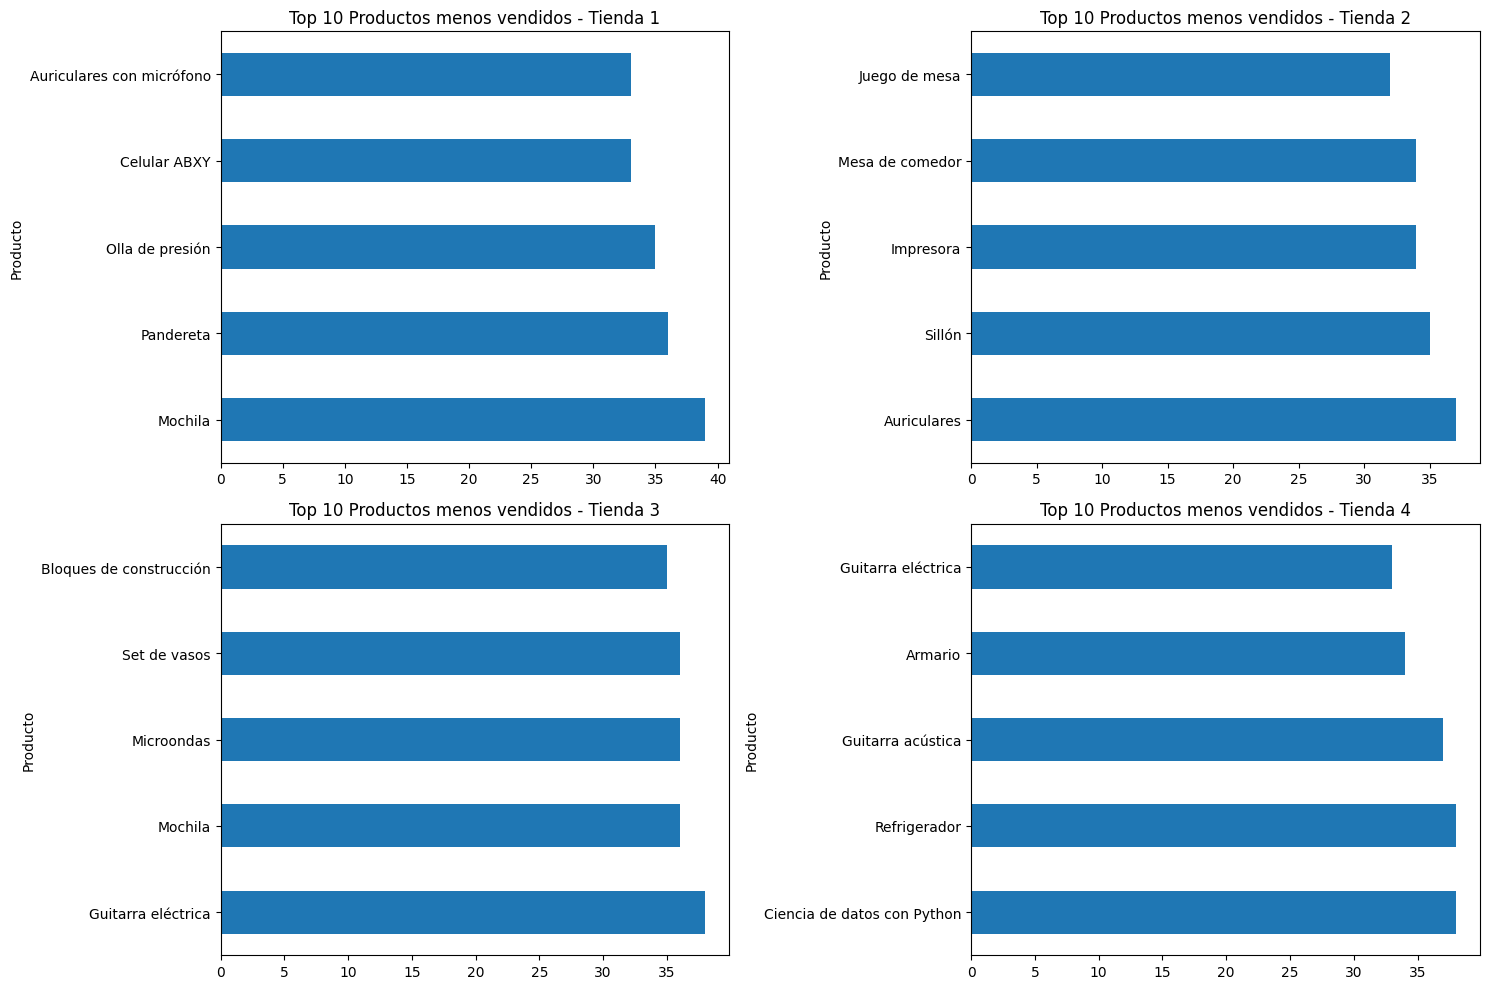

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

tienda1_product_counts.tail(5).plot(kind='barh', ax=axes[0, 0], title='Top 10 Productos menos vendidos - Tienda 1')
tienda2_product_counts.tail(5).plot(kind='barh', ax=axes[0, 1], title='Top 10 Productos menos vendidos - Tienda 2')
tienda3_product_counts.tail(5).plot(kind='barh', ax=axes[1, 0], title='Top 10 Productos menos vendidos - Tienda 3')
tienda4_product_counts.tail(5).plot(kind='barh', ax=axes[1, 1], title='Top 10 Productos menos vendidos - Tienda 4')

plt.tight_layout()
plt.show()

### Promedio costo total

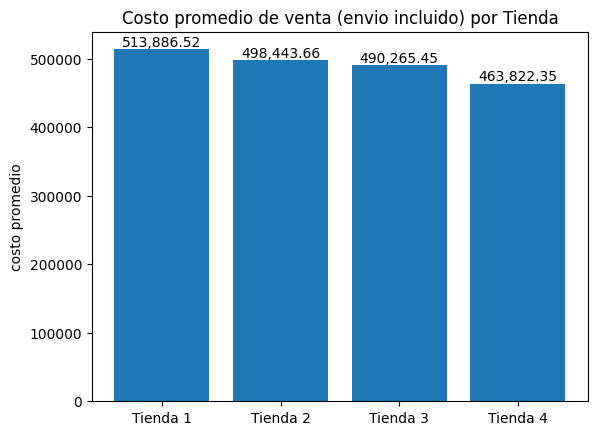

In [17]:
promedio_envios = [promedio_costo_tienda1, promedio_costo_tienda2, promedio_costo_tienda3, promedio_costo_tienda4]

fig, ax = plt.subplots()
bar_container = ax.bar(tiendas, promedio_envios)
ax.set(ylabel='costo promedio', title='Costo promedio de venta (envio incluido) por Tienda')
ax.bar_label(bar_container, fmt='{:,.2f}')
plt.show()

# 7. Informe

De acuerdo con el análisis realizado sobre las cuatro tiendas, se han considerado las siguientes métricas clave: ingresos totales, categorías de productos más y menos vendidos, calificación promedio de los clientes, productos más y menos vendidos, y el costo promedio de envío por artículo. A continuación se presentan los hallazgos más relevantes:

### 1. **Ingresos totales**
La tienda con los ingresos más bajos fue la **Tienda 4**, lo que indica un menor desempeño comercial en comparación con las demás.

### 2. **Categorías de productos más y menos vendidas**
En todas las tiendas, las categorías más vendidas fueron **Muebles** y **Electrónicos**, mostrando una clara preferencia del mercado. Por otro lado, las categorías con menor volumen de ventas fueron **Libros**, **Artículos para el hogar** e **Instrumentos musicales**, lo que sugiere baja rotación y menor demanda.

### 3. **Calificación promedio de los clientes**
Las tiendas con la calificación promedio más baja fueron la **Tienda 1** y la **Tienda 4**, lo que podría reflejar problemas en la experiencia del cliente, calidad del producto o servicio postventa.

### 4. **Productos más y menos vendidos**
- **Más vendidos:**
  - *Tienda 1:* Armario, TV Led, Microondas  
  - *Tienda 2:* Iniciando en programación, Microondas, Batería  
  - *Tienda 3:* Kit de bancas, Mesa de comedor, Cama King  
  - *Tienda 4:* Cama Box, Cubertería, Cama King  

- **Menos vendidos:**
  - *Tienda 1:* Mochila, Pandereta, Olla a presión  
  - *Tienda 2:* Auriculares, Sillón, Impresora  
  - *Tienda 3:* Guitarra eléctrica, Mochila, Microondas  
  - *Tienda 4:* Ciencia de datos con Python, Refrigerador, Guitarra acústica  

Este patrón revela que algunas tiendas tienen productos con baja rotación que podrían estar afectando su eficiencia operativa.

### 5. **Costo promedio de envío**
La **Tienda 1** presenta el costo de envío promedio más alto, lo que puede impactar negativamente en la rentabilidad. En contraste, la **Tienda 4** tiene el costo de envío más bajo, lo que podría ser una ventaja logística, aunque no compensa sus bajos ingresos y calificación.

---

## **Conclusión**

Considerando todas las métricas analizadas —ventas totales, desempeño por categoría, satisfacción del cliente, rotación de productos y costos logísticos—, la **Tienda 4** se perfila como la menos eficiente. Su bajo volumen de ventas, baja calificación promedio y limitada rotación de productos justifican su evaluación como candidata para ser vendida o reestructurada.






